In [300]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import random as rnd
import statistics as stat
import numpy as np

In [301]:
# --- globals --- #

# let there be n agents with random initial assesements
# every agent is represented by an integer in [0, n)
n = 40
epsilon = .1
alpha = .75
noise = .1
tau = .4
max_time = 20
data = []

In [302]:
# --- classes --- #

class Agent:
    def __init__(self, id):
        self.assesment = 1 - rnd.random() # values in (0, 1]
        self.previous_assesment = self.assesment # later needed to make the assesments of all agents change simultaneously
        self.peers = set()
        self.id = id
    
    def __str__(self):
        return f"assesment: {self.assesment} and peers: {self.peers}"

    def __repr__(self):
        return f"(Agent [{self.id}]: {self.assesment:.2f}, {self.peers})"

    def update_peers(self, agent_list):
        for potential_peer in agent_list:
            if (abs(potential_peer.assesment - self.assesment) < epsilon):
                self.peers.add(potential_peer)

In [303]:
# --- functions --- #

def print_agent_list(agent_list):
    print("[")
    for agent in agent_list:
        representation = f"    (Agent [{agent.id}]: {agent.assesment:.2f}, " + "{"
        representation += ", ".join(f"[{peer.id}]" for peer in agent.peers) + "})"
    
        print(representation)
    print("]")

In [304]:
# --- main code for abm --- #

agents = []
for i in range(n):
    agent = Agent(i)
    agents.append(agent)
    data.append([agent.id, 0, agent.assesment])

In [305]:
# for each agent let there be a set of agents with similar assesments
for i in range(n):
    agents[i].update_peers(agents)

In [306]:
# for each time step
for u in range(1, max_time): # we did the fist step by setting everything up

    # update the assesment of each agent to a ratio between the agents assesments and the mean of their peers
    for agent in agents:

        # observing
        observation = np.random.normal(tau, noise) # random value from bell curve around tau with noise as 2 std deviations
        while observation <= 0 or observation > 1: # cutting off observations outside (0, 1]
            observation = np.random.normal(tau, noise/2)
        observation *= (1 - alpha)

        # listening to peers
        collective_peer_assesment = alpha * stat.mean([peer.previous_assesment for peer in agent.peers])

        agent.assesment = observation + collective_peer_assesment
        data.append([agent.id, u, agent.assesment])

    # update each agents peers and prepare previous assesment for next loop
    for agent in agents:
        agent.update_peers(agents)
        agent.previous_assesment = agent.assesment
        

In [307]:
dataframe = pd.DataFrame(data, columns=["agent", "time", "assesment"])
dataframe

,agent,time,assesment
0,0,0,0.023930
1,1,0,0.992760
2,2,0,0.346249
3,3,0,0.866700
4,4,0,0.472505
...,...,...,...
795,35,19,0.413969
796,36,19,0.418298
797,37,19,0.424152
798,38,19,0.364977


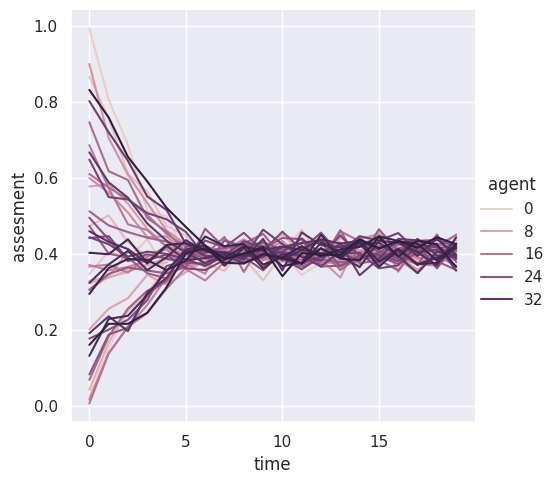

In [308]:
sns.set_theme()

sns.relplot(
    data=dataframe, kind="line",
    x="time", y="assesment", hue="agent")

plt.show()

(0.0, 1.0)

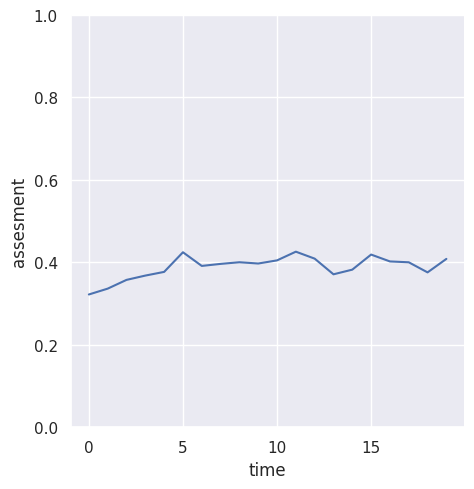

In [309]:

sns.relplot(
    dataframe[dataframe["agent"] == 5], kind="line",
    x="time", y="assesment", facet_kws={"sharex":False})
plt.ylim(0, 1)

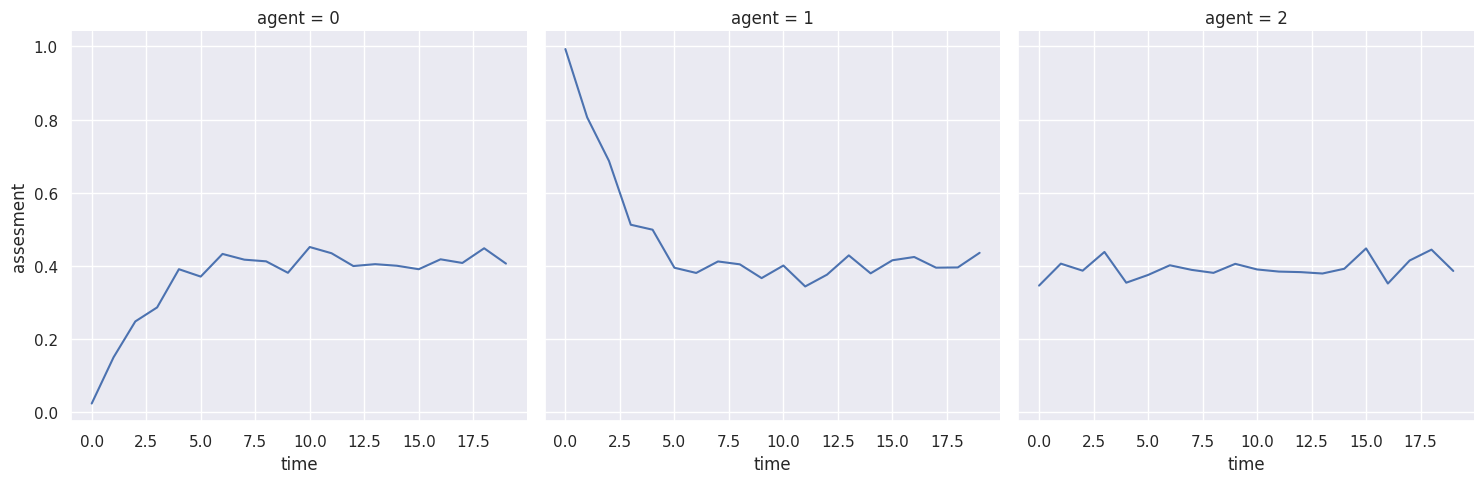

In [310]:
sns.relplot(
    data=dataframe[dataframe["agent"] < 3], kind="line",
    x="time", y="assesment", col="agent")

plt.show()

In [311]:
dataframe[dataframe["agent"] < 1]

,agent,time,assesment
0,0,0,0.023930
40,0,1,0.150065
80,0,2,0.248335
120,0,3,0.286607
160,0,4,0.391070
200,0,5,0.370858
240,0,6,0.432795
280,0,7,0.417133
320,0,8,0.412575
360,0,9,0.381223


In [312]:
dataframe[dataframe["time"] == 0]

,agent,time,assesment
0,0,0,0.023930
1,1,0,0.992760
2,2,0,0.346249
3,3,0,0.866700
4,4,0,0.472505
5,5,0,0.322081
6,6,0,0.041392
7,7,0,0.328527
8,8,0,0.200535
9,9,0,0.577148
